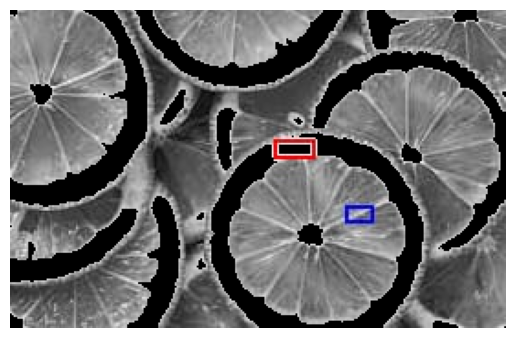

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/image_new (1).jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Threshold the grayscale image to get a binary mask of white pixels
_, mask = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)


# Invert the mask to get a binary mask of black pixels
mask_inv = cv2.bitwise_not(mask)

# Apply the mask to the original image to change white pixels to black
result_image = cv2.bitwise_and(image, image, mask=mask_inv)

# Convert result to RGB for displaying with matplotlib
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.imshow(result_image_rgb)
plt.axis('off')
plt.show()

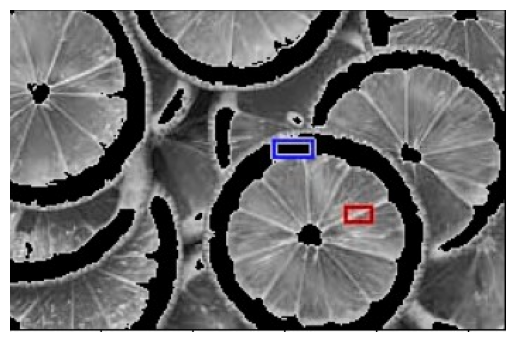

In [ ]:
image = cv2.imread('/content/Expected Output (1).jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
from transformers import pipeline
import language_tool_python

# Load GPT model for language generation
gpt_model = pipeline("text-generation", model="gpt2")

# Load LanguageTool for grammar checking and correction
tool = language_tool_python.LanguageTool('en-US')

def is_grammatically_correct(sentence):
    # Check if the generated text is grammatically correct using LanguageTool
    matches = tool.check(sentence)
    print(matches)

    # If there are no matches (i.e., no grammar errors), return True
    return len(matches) == 0

def get_grammar_corrections(sentence):
    # Use LanguageTool to check grammar and provide corrections
    matches = tool.check(sentence)
    suggestions = [match.replacements[0] if match.replacements else match.ruleId for match in matches]
    return suggestions

def check_and_correct_grammar(sentence):
    # Check if the sentence is grammatically correct
    if is_grammatically_correct(sentence):
        return "The sentence is grammatically correct."
    else:
        # Get grammar corrections
        corrections = get_grammar_corrections(sentence)
        return corrections

user_input = input("Enter a sentence: ")
print(f"Sentence: {user_input}")
corrections = check_and_correct_grammar(user_input)
if len(corrections)!=0:
  print("The sentence is not grammatically correct. Suggestions for corrections:")
  print(corrections)
else:
  print('The sentence is grammatically correct')



Enter a sentence: I am go out.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sentence: I am go out.
I am go out. I am go out. I am go out. I am
[Match({'ruleId': 'I_AM_VB', 'message': 'Did you mean “I am going”?', 'replacements': ['I am going'], 'offsetInContext': 0, 'context': 'I am go out.', 'offset': 0, 'errorLength': 7, 'category': 'GRAMMAR', 'ruleIssueType': 'grammar', 'sentence': 'I am go out.'})]
The sentence is not grammatically correct. Suggestions for corrections:
['I am going']


In [ ]:
user_input = input("Enter a sentence: ")
print(f"Sentence: {user_input}")
corrections = check_and_correct_grammar(user_input)
if len(corrections)!=0:
  print("The sentence is not grammatically correct. Suggestions for corrections:")
  print(corrections)
else:
  print('The sentence is grammatically correct')


Enter a sentence: I will slept.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sentence: I will slept.
I will slept. I will sleep. I will sleep. I will sleep. I will
[Match({'ruleId': 'MD_BASEFORM', 'message': 'The modal verb ‘will’ requires the verb’s base form.', 'replacements': ['sleep'], 'offsetInContext': 7, 'context': 'I will slept.', 'offset': 7, 'errorLength': 5, 'category': 'GRAMMAR', 'ruleIssueType': 'grammar', 'sentence': 'I will slept.'})]
The sentence is not grammatically correct. Suggestions for corrections:
['sleep']


In [ ]:
import spacy

# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to generate and visualize parse tree
def generate_parse_tree(sentence):
    # Process the input sentence with SpaCy
    doc = nlp(sentence)

    # Print tokens and their dependencies
    for token in doc:
        print(f"{token.text} --{token.dep_}--> {token.head.text}")

    # Print the parse tree in a nested format
    print("\nParse tree:")
    for token in doc:
        print(token.text, token.dep_, token.head.text, [child for child in token.children])

# Example sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Generate and visualize parse tree
generate_parse_tree(sentence)


The --det--> fox
quick --amod--> fox
brown --amod--> fox
fox --nsubj--> jumps
jumps --ROOT--> jumps
over --prep--> jumps
the --det--> dog
lazy --amod--> dog
dog --pobj--> over
. --punct--> jumps

Parse tree:
The det fox []
quick amod fox []
brown amod fox []
fox nsubj jumps [The, quick, brown]
jumps ROOT jumps [fox, over, .]
over prep jumps [dog]
the det dog []
lazy amod dog []
dog pobj over [the, lazy]
. punct jumps []


In [ ]:
import nltk
from nltk import Tree

# Example sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Tokenize the sentence
tokens = nltk.word_tokenize(sentence)

# Tag the tokens with part-of-speech (POS) tags
tagged_tokens = nltk.pos_tag(tokens)

# Use the Recursive Descent Parser to generate the parse tree
grammar = "NP: {<DT>?<JJ>*<NN>}"
parser = nltk.RegexpParser(grammar)
parse_tree = parser.parse(tagged_tokens)

# Define a function to convert the NLTK parse tree to a tree structure
def nltk_tree_to_tree_structure(nltk_tree):
    if isinstance(nltk_tree, nltk.Tree):
        return Tree(nltk_tree.label(), [nltk_tree_to_tree_structure(child) for child in nltk_tree])
    else:
        return nltk_tree

# Convert the NLTK parse tree to a tree structure
tree_structure = nltk_tree_to_tree_structure(parse_tree)

# Print the tree structure
print(tree_structure)


(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  jumps/VBZ
  over/IN
  (NP the/DT lazy/JJ dog/NN)
  ./.)


In [ ]:
import nltk

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
from nltk import Tree

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Example sentence
sentence = "The quick brown fox jumps over the lazy dog"

# Tokenize the sentence
tokens = nltk.word_tokenize(sentence)

# Tag the tokens with part-of-speech (POS) tags
tagged_tokens = nltk.pos_tag(tokens)

# Use the Recursive Descent Parser to generate the parse tree
grammar = "NP: {<DT>?<JJ>*<NN>}"
parser = nltk.RegexpParser(grammar)
parse_tree = parser.parse(tagged_tokens)

# Define a function to convert the NLTK parse tree to a tree structure
def nltk_tree_to_tree_structure(nltk_tree):
    if isinstance(nltk_tree, nltk.Tree):
        return Tree(nltk_tree.label(), [nltk_tree_to_tree_structure(child) for child in nltk_tree])
    else:
        return nltk_tree

# Convert the NLTK parse tree to a tree structure
tree_structure = nltk_tree_to_tree_structure(parse_tree)

# Print the tree structure
print(tree_structure)

(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  jumps/VBZ
  over/IN
  (NP the/DT lazy/JJ dog/NN))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Import required libraries
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize, RegexpParser

# Example text
sample_text = "The quick brown fox jumps over the lazy dog"

# Find all parts of speech in the above sentence
tagged = pos_tag(word_tokenize(sample_text))

# Define the regular expression grammar for chunking
chunker = RegexpParser("""
    NP: {<DT>?<JJ>*<NN>}  # To extract Noun Phrases
    P: {<IN>}              # To extract Prepositions
    V: {<V.*>}             # To extract Verbs
    PP: {<P> <NP>}         # To extract Prepositional Phrases
    VP: {<V> <NP|PP>*}     # To extract Verb Phrases
""")

# Print all parts of speech in the above sentence
output = chunker.parse(tagged)
print("After Extracting\n", output)


After Extracting
 (S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  (VP (V jumps/VBZ) (PP (P over/IN) (NP the/DT lazy/JJ dog/NN))))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Example sentences
sentences = [
    "Data science and AI are revolutionizing industries by extracting actionable insights from vast amounts of data.",
    "AI algorithms powered by data science techniques enable businesses to make data-driven decisions, leading to increased efficiency and competitiveness.",
    "In healthcare, data science and AI play a crucial role in diagnosing diseases, predicting patient outcomes, and personalizing treatment plans.",
    "The finance sector relies on data science and AI for fraud detection, risk assessment, algorithmic trading, and personalized financial services.",
    "Data science and AI are transforming education by providing personalized learning experiences, adaptive assessments, and intelligent tutoring systems.",
    "Governments leverage data science and AI for public policy analysis, resource allocation, crime prediction, and disaster response planning.",
    "Data science and AI are driving innovation in transportation through autonomous vehicles, traffic optimization, and predictive maintenance.",
    "E-commerce platforms utilize data science and AI to enhance customer experiences, optimize pricing strategies, and personalize product recommendations.",
    "In manufacturing, data science and AI enable predictive maintenance, quality control, supply chain optimization, and smart manufacturing processes.",
    "Data science and AI empower researchers with tools for analyzing complex datasets, accelerating scientific discoveries, and advancing knowledge across various domains."
]

# Combine sentences into a paragraph
paragraph = ' '.join(sentences)

# Tokenize the paragraph
inputs = tokenizer(paragraph, return_tensors='pt', padding=True, truncation=True)

# Get the BERT model outputs
with torch.no_grad():
    outputs = model(**inputs)

# Get the hidden states (last layer) from BERT
last_hidden_states = outputs.last_hidden_state

# Compute the mean of each token's hidden states
token_embeddings = torch.mean(last_hidden_states, dim=1)

# Compute attention scores for each token
attention_scores = torch.nn.functional.softmax(torch.matmul(token_embeddings, token_embeddings.T), dim=1)

# Get the index of the token with the highest attention score
most_important_token_index = torch.argmax(torch.max(attention_scores, dim=1)[0])

# Convert the tensor index to a scalar integer
most_important_token_index = most_important_token_index.item()

# Convert the token ID to a phrase
most_important_phrase = tokenizer.decode(inputs.input_ids[0][most_important_token_index].item())

print("Most important phrase:", most_important_phrase)


Most important phrase: [ C L S ]


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from nltk import ngrams

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Example sentences
sentences = ["Data science and AI are revolutionizing industries by extracting actionable insights from vast amounts of data.",
    "AI algorithms powered by data science techniques enable businesses to make data-driven decisions, leading to increased efficiency and competitiveness.",
    "In healthcare, data science and AI play a crucial role in diagnosing diseases, predicting patient outcomes, and personalizing treatment plans.",
    "The finance sector relies on data science and AI for fraud detection, risk assessment, algorithmic trading, and personalized financial services.",
    "Data science and AI are transforming education by providing personalized learning experiences, adaptive assessments, and intelligent tutoring systems.",
    "Governments leverage data science and AI for public policy analysis, resource allocation, crime prediction, and disaster response planning.",
    "Data science and AI are driving innovation in transportation through autonomous vehicles, traffic optimization, and predictive maintenance.",
    "E-commerce platforms utilize data science and AI to enhance customer experiences, optimize pricing strategies, and personalize product recommendations.",
    "In manufacturing, data science and AI enable predictive maintenance, quality control, supply chain optimization, and smart manufacturing processes.",
    "Data science and AI empower researchers with tools for analyzing complex datasets, accelerating scientific discoveries, and advancing knowledge across various domains."]

# Combine sentences into a paragraph
paragraph = ' '.join(sentences)

# Tokenize the paragraph
paragraph_tokens = tokenizer.tokenize(paragraph)

# Generate trigrams and 4-grams
trigrams = list(ngrams(paragraph_tokens, 3))
fourgrams = list(ngrams(paragraph_tokens, 4))

# Initialize a dictionary to store attention scores for each n-gram
attention_scores = {}

# Iterate over each trigram
for trigram in trigrams:
    # Convert the trigram into input IDs
    input_ids = tokenizer.encode(' '.join(trigram), add_special_tokens=True, return_tensors='pt')

    # Pass the input IDs through the BERT model
    with torch.no_grad():
        outputs = model(input_ids)

    # Get the attention scores from the last layer
    attention = outputs.attentions[-1][0]  # Assuming BERT-base has 12 layers

    # Aggregate attention scores (e.g., take the mean)
    score = torch.mean(attention)

    # Store the attention score for the trigram
    attention_scores[trigram] = score.item()

# Iterate over each fourgram
for fourgram in fourgrams:
    # Convert the fourgram into input IDs
    input_ids = tokenizer.encode(' '.join(fourgram), add_special_tokens=True, return_tensors='pt')

    # Pass the input IDs through the BERT model
    with torch.no_grad():
        outputs = model(input_ids)

    # Get the attention scores from the last layer
    attention = outputs.attentions[-1][0]  # Assuming BERT-base has 12 layers

    # Aggregate attention scores (e.g., take the mean)
    score = torch.mean(attention)

    # Store the attention score for the fourgram
    attention_scores[fourgram] = score.item()

# Sort the n-grams based on their attention scores
sorted_ngrams = sorted(attention_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 n-grams with their attention scores
for ngram, score in sorted_ngrams[:25]:
    print(f"N-gram: {' '.join(ngram)}, Attention Score: {score}")


N-gram: allocation , crime, Attention Score: 0.20000003278255463
N-gram: manufacturing , data, Attention Score: 0.20000003278255463
N-gram: from vast amounts, Attention Score: 0.20000001788139343
N-gram: of data ., Attention Score: 0.20000001788139343
N-gram: algorithms powered by, Attention Score: 0.20000001788139343
N-gram: data - driven, Attention Score: 0.20000001788139343
N-gram: leading to increased, Attention Score: 0.20000001788139343
N-gram: in healthcare ,, Attention Score: 0.20000001788139343
N-gram: healthcare , data, Attention Score: 0.20000001788139343
N-gram: , data science, Attention Score: 0.20000001788139343
N-gram: ai play a, Attention Score: 0.20000001788139343
N-gram: , predicting patient, Attention Score: 0.20000001788139343
N-gram: ai for fraud, Attention Score: 0.20000001788139343
N-gram: by providing personal, Attention Score: 0.20000001788139343
N-gram: systems . governments, Attention Score: 0.20000001788139343


Epoch 1/5
1563/1563 [==============================] - 74s 46ms/step - loss: 1.7799 - accuracy: 0.3420 - val_loss: 1.3577 - val_accuracy: 0.5082
Epoch 2/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4030 - accuracy: 0.4989 - val_loss: 1.1864 - val_accuracy: 0.5789
Epoch 3/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2764 - accuracy: 0.5474 - val_loss: 1.1432 - val_accuracy: 0.5950
Epoch 4/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1830 - accuracy: 0.5845 - val_loss: 1.0292 - val_accuracy: 0.6369
Epoch 5/5
313/313 [==============================] - 4s 14ms/step - loss: 1.0115 - accuracy: 0.6428
Epoch 1/5
1563/1563 [==============================] - 75s 47ms/step - loss: 1.7246 - accuracy: 0.3652 - val_loss: 1.3329 - val_accuracy: 0.5241
Epoch 2/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.3480 - accuracy: 0.5232 - val_loss: 1.1621 - val_accuracy: 0.5782
Epoch 3/5
1563/1563 [=========

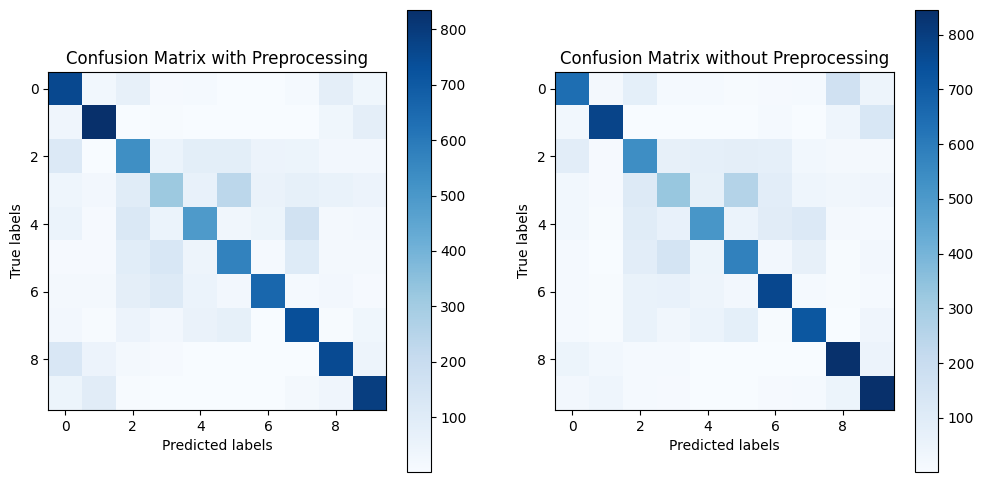

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import exposure

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocessing: Normalization
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Preprocessing: Image Enhancement
def enhance_images(images):
    enhanced_images = np.zeros_like(images)
    for i, image in enumerate(images):
        enhanced_images[i] = exposure.equalize_adapthist(image, clip_limit=0.03)
    return enhanced_images

# Enhance train and test images
train_images = enhance_images(train_images)
test_images = enhance_images(test_images)

# Define CNN architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate model with preprocessing
model_with_preprocessing = create_model()
history_with_preprocessing = model_with_preprocessing.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32, validation_data=(test_images, to_categorical(test_labels)))
test_loss_with_preprocessing, test_acc_with_preprocessing = model_with_preprocessing.evaluate(test_images, to_categorical(test_labels))

# Train and evaluate model without preprocessing
model_without_preprocessing = create_model()
history_without_preprocessing = model_without_preprocessing.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32, validation_data=(test_images, to_categorical(test_labels)))
test_loss_without_preprocessing, test_acc_without_preprocessing = model_without_preprocessing.evaluate(test_images, to_categorical(test_labels))

# Generate confusion matrices
predictions_with_preprocessing = np.argmax(model_with_preprocessing.predict(test_images), axis=-1)
cm_with_preprocessing = confusion_matrix(test_labels, predictions_with_preprocessing)

predictions_without_preprocessing = np.argmax(model_without_preprocessing.predict(test_images), axis=-1)
cm_without_preprocessing = confusion_matrix(test_labels, predictions_without_preprocessing)

# Print accuracy and confusion matrices
print("Accuracy with preprocessing:", test_acc_with_preprocessing)
print("Accuracy without preprocessing:", test_acc_without_preprocessing)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cm_with_preprocessing, cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Preprocessing')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(cm_without_preprocessing, cmap=plt.cm.Blues)
plt.title('Confusion Matrix without Preprocessing')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.colorbar()
plt.show()
